In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Advanced Goals (Report)

    1.) Get the degrees of separation for 1000 random pages. Find the median degree of separation as well as the distribution.
    
    2.) Considering your results, and the size of the English Wikipedia, estimate how many pages there are of degree 6.
    
    3.) Try a foreign language Wikipedia. Following the same rules above, determine the network structure. 
    Is there is a page a page that all others tend to lead back to? 
    Does it tend to loop more? 
    In any case, are the degrees generally shorter/longer?

# Function Definitions

In [48]:
# from scipy.signal import argrelextrema
import numpy as np

def load_data(folder_path):
    """
    Loads data from CSV files in a given folder into a single DataFrame.

    Parameters:
    folder_path (str): The path to the folder containing the CSV files.

    Returns:
    df (DataFrame): A consolidated DataFrame containing data from all
    CSV files in the folder.
    """

    # List to hold individual DataFrames
    dfs = []

    # Loop through each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            # Read the CSV file into a DataFrame
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            
            # Append the DataFrame to the list
            dfs.append(df)

    df = pd.concat(dfs, ignore_index=True)
    df = df.drop_duplicates().fillna('No msg found.')
    del dfs
    print(f'Consolidated dataframe shape: {df.shape}')
    # df.head()
    return df

def get_query(df, query):
    """
    Executes a query on a DataFrame and returns the df & number of rows that match the query, 
    the total number of rows in the DataFrame, and the proportion of rows that match the query.
    """
    ndf = df.query(query)
    nquery = ndf.shape[0]
    ntotal = df.shape[0]
    p = nquery/ntotal
    return ndf, nquery, ntotal, p

def plot_dos(df, med, mean, lang='en'):
    """
    Plots the distribution of Degrees of Separation (DoS) in the data.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    med (float): The median DoS.
    mean (float): The mean DoS.
    """

    # df['DoS'].plot(kind="hist", bins=20, title = 'DOS Distribution');
    fig, ax = plt.subplots()
    data_range = int(df['DoS'].max() - df['DoS'].min())
    counts, bine, _ = ax.hist(df['DoS'], bins=data_range, alpha=0.6)
    
    ax.set_title(f'DoS Distribution ({"English" if lang == 'en' else "Spanish"})')
    ax.set_xlabel('Degrees of Separation (DoS)')
    ax.set_ylabel('Frequency')
    
    ax.axvline(med, color='r', linestyle = '--')
    # ax.axvline(mean, color='g', linestyle = '--')

    # Find the indices of the local maxima
    # maxima = argrelextrema(counts, np.greater)
    # top_3_maxima = sorted(maxima[0], key=lambda x: counts[x], reverse=True)[:3]
    # print(top_3_maxima)
    if lang == 'en':
        top_3_maxima = np.array([-1, 15, 22]) - int(df['DoS'].min())
    else:
        top_3_maxima = np.array([-1, 8, 16]) - int(df['DoS'].min())


    # Annotate the local maxima
    for idx in top_3_maxima:
        ax.annotate(f'DoS={bine[idx]:.0f}, Freq={counts[idx]:.0f}',
                    xy=(bine[idx]+0.5, counts[idx]+0.5),
                    xytext=(10, 10), textcoords='offset points',
                    arrowprops=dict(facecolor='gray', shrink=0.02))

def get_median(df):
    """
    Calculates the median Degrees of Separation (DoS) in the data.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    
    Returns:
    median (float): The median DoS.
    """

    median = df['DoS'].median()
    # print(f'Median: {median}')
    return median

def get_mean(df):
    """
    Calculates the mean Degrees of Separation (DoS) in the data.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    
    Returns:
    mean (float): The mean DoS.
    """

    mean = df['DoS'].mean()
    # print(f'Mean: {mean}')
    return mean


# 1.a  Loading consolidated EN data

In [49]:
f = ['', '_f', '_val_0514', '_josh_0515', '_test']
en = load_data(f'en_conso{f[0]}')
print(f'A total of {en.shape[0]} English Wikipedia random pages have been crawled.')
print(f'The DataFrame shows the resulting DoS and Path to reach Philosophy from each random page (Start).')
_, nsuccess, ntotal, p = get_query(en, 'DoS != -1')
print(f'In total, {nsuccess} random pages converged to Philosophy, which is {p:.2%} of the {ntotal} random pages crawled.')
display(en.head())

Consolidated dataframe shape: (6590, 4)
A total of 6590 English Wikipedia random pages have been crawled.
The DataFrame shows the resulting DoS and Path to reach Philosophy from each random page (Start).
In total, 6085 random pages converged to Philosophy, which is 92.34% of the 6590 random pages crawled.


,Start,DoS,Path,Msg
0,/wiki/Man_and_Woman_(TV_series),10.0,['https://en.wikipedia.org/wiki/Man_and_Woman_...,OK - short path at /wiki/Language (last idx: 4).
1,/wiki/Parviz_Nouri,14.0,"['https://en.wikipedia.org/wiki/Parviz_Nouri',...",OK - short path at /wiki/Capital_city (last id...
2,"/wiki/Ste._Rita,_Manitoba",16.0,"['https://en.wikipedia.org/wiki/Ste._Rita,_Man...",OK - short path at /wiki/Unincorporated_area (...
3,/wiki/Konstantinos_Vlachopoulos,22.0,['https://en.wikipedia.org/wiki/Konstantinos_V...,OK - short path at /wiki/Military_organization...
4,/wiki/Gopalnagar_railway_station,18.0,['https://en.wikipedia.org/wiki/Gopalnagar_rai...,OK - short path at /wiki/Means_of_transport (l...


# 1.b Get median and plot DoS distribution

Median = 17.0
Counting the random pages that did not reach Philosophy (DoS = -1), the median is 17.0 - vertical dashed red line in the plot.
In the distribution, there are three observed local maxima - at DoS = -1 where loops were encountered, at DoS = 15 and at DoS = 22.


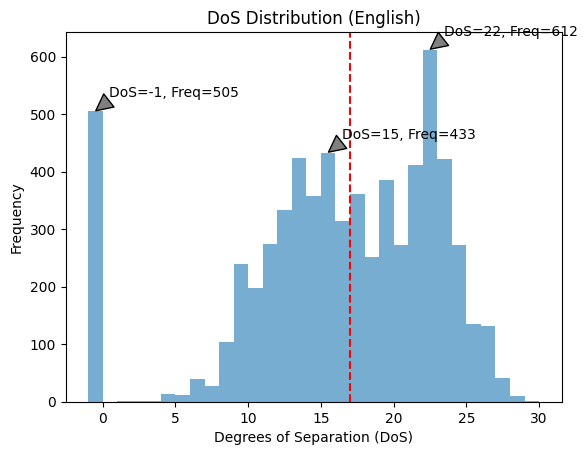

In [50]:

plot_dos(en, get_median(en), get_mean(en))
print(f'Median = {get_median(en)}')
print(f'Counting the random pages that did not reach Philosophy (DoS = -1), '
      f'the median is {get_median(en)} - vertical dashed red line in the plot.')
print(f'In the distribution, there are three observed local maxima - '
      f'at DoS = -1 where loops were encountered, at DoS = 15 and at DoS = 22.')

# 2. Estimate number of pages with DOS = 6

In [51]:
df6, n6, nt, p6 = get_query(en, 'DoS == 6')
print(f'In total, {n6} random pages have DoS = 6, which is {p6:.2%} of the {nt} English Wikipedia random pages crawled.')
display(df6)
# print(f"{round(pct_dos6, 2)}% of our sample has DoS = 6.")

In total, 40 random pages have DoS = 6, which is 0.61% of the 6590 English Wikipedia random pages crawled.


,Start,DoS,Path,Msg
221,"/wiki/RMIT_School_of_Civil,_Environmental_and_...",6.0,['https://en.wikipedia.org/wiki/RMIT_School_of...,OK - short path at /wiki/Tertiary_education (l...
270,/wiki/The_Journal_of_Neuropsychiatry_and_Clini...,6.0,['https://en.wikipedia.org/wiki/The_Journal_of...,OK - short path at /wiki/Knowledge (last idx: 3).
441,/wiki/Ernst_Boepple,6.0,['https://en.wikipedia.org/wiki/Ernst_Boepple'...,OK - normal path.
725,/wiki/46_(number),6.0,"['https://en.wikipedia.org/wiki/46_(number)', ...",OK - short path at /wiki/Mathematics (last idx...
845,/wiki/The_German_Quarterly,6.0,['https://en.wikipedia.org/wiki/The_German_Qua...,OK - short path at /wiki/Field_of_study (last ...
921,/wiki/Poincar%C3%A9_complex,6.0,['https://en.wikipedia.org/wiki/Poincar%C3%A9_...,OK - short path at /wiki/Mathematics (last idx...
1039,/wiki/Ranunculus_nipponicus,6.0,['https://en.wikipedia.org/wiki/Ranunculus_nip...,OK - normal path.
1040,/wiki/Adolf_Piltz,6.0,"['https://en.wikipedia.org/wiki/Adolf_Piltz', ...",OK - short path at /wiki/Mathematics (last idx...
1230,/wiki/Revista_da_Sociedade_Brasileira_de_Qu%C3...,6.0,['https://en.wikipedia.org/wiki/Revista_da_Soc...,OK - short path at /wiki/Knowledge (last idx: 3).
1294,/wiki/American_Journal_of_Physics,6.0,['https://en.wikipedia.org/wiki/American_Journ...,OK - short path at /wiki/Field_of_study (last ...


According to [Wikipedia](https://en.wikipedia.org/wiki/Wikipedia:Size_of_Wikipedia), there are 6,823,122 English Wiki articles as of May 2024. According to our results, only 0.70% of Wiki Articles have $DoS = 6$ to the Philosophy page. We estimate around 47.8K articles having DoS=6 in English Wikipedia.

In [52]:
print(f"Estimated number of English Wikipedia articles with DoS = 6: {6823122 * p6:.0f}")

Estimated number of English Wikipedia articles with DoS = 6: 41415


# 3. ES data - load, median, distribution, DoS = 6

Consolidated dataframe shape: (5350, 4)
A total of 5350 Spanish Wikipedia random pages have been crawled.
The DataFrame shows the resulting DoS and Path to reach Psicología from each random page (Start).
In total, 4243 random pages converged to Psicología, which is 79.31% of the 5350 random pages crawled.
We will see in section 3.a that Psicología is the most common page where other page gravitate to.


,Start,DoS,Path,Msg
0,/wiki/Advantage_(album),19.0,['https://en.wikipedia.org/wiki/Advantage_(alb...,OK - normal path.
1,/wiki/Black_Path,21.0,"['https://en.wikipedia.org/wiki/Black_Path', '...",OK - short path at /wiki/Physics (last idx: 10).
2,/wiki/S%C3%A9bastien_Cantini,22.0,['https://en.wikipedia.org/wiki/S%C3%A9bastien...,OK - short path at /wiki/Physics (last idx: 11).
3,/wiki/Umluj,13.0,"['https://en.wikipedia.org/wiki/Umluj', 'https...",OK - normal path.
4,/wiki/Sea_Eye_Lake,18.0,"['https://en.wikipedia.org/wiki/Sea_Eye_Lake',...",OK - short path at /wiki/Planet (last idx: 4).


Median = 12.0
Counting the random pages that did not reach Psicología (DoS = -1), the median is 12.0 - vertical dashed red line in the plot.
In the distribution, there are three observed local maxima - at DoS = -1 where loops were encountered, at DoS = 8 and at DoS = 16.


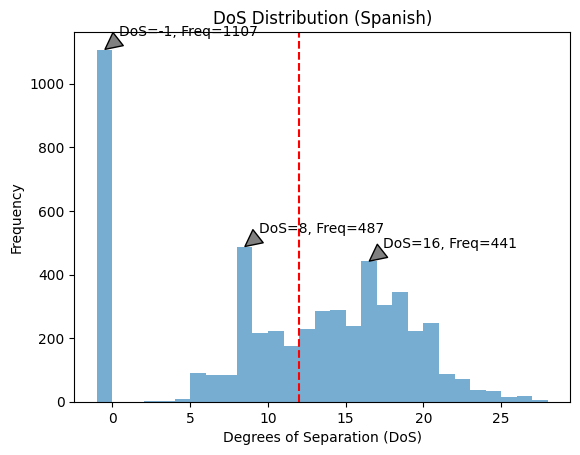

In [53]:
f = ['', '_f', '_j']
es = load_data(f'es_conso')
print(f'A total of {es.shape[0]} Spanish Wikipedia random pages have been crawled.')
print(f'The DataFrame shows the resulting DoS and Path to reach Psicología from each random page (Start).')
_, nsuccess, ntotal, p = get_query(es, 'DoS != -1')
print(f'In total, {nsuccess} random pages converged to Psicología, which is {p:.2%} of the {ntotal} random pages crawled.')
print(f'We will see in section 3.a that Psicología is the most common page where other page gravitate to.')
display(es.head())

plot_dos(es, get_median(es), get_mean(es), 'es')
print(f'Median = {get_median(es)}')
print(f'Counting the random pages that did not reach Psicología (DoS = -1), '
      f'the median is {get_median(es)} - vertical dashed red line in the plot.')
print(f'In the distribution, there are three observed local maxima - '
      f'at DoS = -1 where loops were encountered, at DoS = 8 and at DoS = 16.')


In [40]:
df6, n6, nt, p6 = get_query(es, 'DoS == 6')
print(f'In total, {n6} random pages have DoS = 6, which is {p6:.2%} of the {nt} Spanish Wikipedia random pages crawled.')
print(f"As there are 1951366 articles in Spanish Wikipedia, an estimated {1951366 * p6:.0f} articles have DoS = 6.")
display(df6)

In total, 23 random pages have DoS = 6, which is 1.92% of the 1200 Spanish Wikipedia random pages crawled.
As there are 1951366 articles in Spanish Wikipedia, an estimated 37401 articles have DoS = 6.


,Start,DoS,Path,Msg
4,/wiki/Campeonato_Mundial_de_Tiro_al_Plato_de_1995,6.0,['https://es.wikipedia.org/wiki/Campeonato_Mun...,OK - normal path.
13,/wiki/Anexo:Masters_de_Roma_1982_(dobles_femen...,6.0,['https://es.wikipedia.org/wiki/Anexo:Masters_...,OK - short path at /wiki/Deporte (last idx: 3).
40,/wiki/AEW_TNT_Championship,6.0,['https://es.wikipedia.org/wiki/AEW_TNT_Champi...,OK - short path at /wiki/Deporte (last idx: 3).
61,/wiki/Valcho_Stoyev,6.0,['https://es.wikipedia.org/wiki/Valcho_Stoyev'...,OK - short path at /wiki/Deporte (last idx: 3).
141,/wiki/Anexo:Campeonato_nacional_de_Estados_Uni...,6.0,['https://es.wikipedia.org/wiki/Anexo:Campeona...,OK - short path at /wiki/Tenista (last idx: 2).
198,/wiki/Anexo:Torneo_Conde_de_God%C3%B3_2006_(in...,6.0,['https://es.wikipedia.org/wiki/Anexo:Torneo_C...,OK - short path at /wiki/Deporte (last idx: 3).
247,/wiki/Torneo_de_Pek%C3%ADn_2023,6.0,['https://es.wikipedia.org/wiki/Torneo_de_Pek%...,OK - short path at /wiki/Tenis (last idx: 2).
298,/wiki/Grand_Theft_Auto_V,6.0,['https://es.wikipedia.org/wiki/Grand_Theft_Au...,OK - short path at /wiki/Juego (last idx: 4).
319,/wiki/Fara%C3%B3n_(videojuego),6.0,['https://es.wikipedia.org/wiki/Fara%C3%B3n_(v...,OK - short path at /wiki/Juego_electr%C3%B3nic...
362,/wiki/John_Hennigan,6.0,['https://es.wikipedia.org/wiki/John_Hennigan'...,OK - short path at /wiki/Lucha_libre_profesion...


# 3.a Page visited most

In [133]:
def fix_short_paths(data, csv_partition , search_iter):
    print('Recovering full paths for shortcuts')
    # Data partition for optimization
    partition_index = 0
    # Preprocess csv for short paths and loops
    # get short paths
    short_paths_idx = data.loc[data['Msg'].str.contains('short', case = False, na=False)].index.tolist()

    short_looped = 0

    for _ in short_paths_idx:
        # initialize short path checking to start always on index 0 and short_partitions to compare if
        # it finds the shortpath in set iterations
        idx = csv_partition[0]
        short_partition = 0
        if _ >= data.shape[0]:
            break
        target = eval(data.iloc[_]['Path'])[-1]
        # print(target)
        while True: 
            # optimization: if shortpaths are not found in 100 iterations, move on to next data partition 
            # NOTE: the higher the short_partition, the better the accuracy of retrieving the end path e.g Pscilogia
            if short_partition == search_iter:
                partition_index = (partition_index + 1) % len(csv_partition)
                idx = csv_partition[partition_index]
            # break if it reaches end of data
            if idx == data.shape[0]:
                break
            # check if short path is in row
            row_search = eval(data.iloc[idx]['Path'])
            if target in row_search and row_search[-1] != target:
                # when match, append long path to target
                start_idx = row_search.index(target)
                links_to_append = row_search[start_idx+1:]
                new_paths = eval(data.iloc[_]['Path']) + links_to_append
                data.at[_, 'Path'] = str(new_paths)
                
                # if msg is OK, then it terminates the current short path
                if 'OK - normal path' in data.iloc[idx]['Msg']:
                    break
                elif 'NOK - looped' in data.iloc[idx]['Msg']:
                    short_looped += 1
                    break
                target = eval(data.iloc[idx]['Path'])[-1]
            else:
                short_partition += 1
            idx += 1 
    print('Done fixing shortpaths')
    return short_looped      

In [134]:
import ast 
from itertools import chain
from collections import Counter

# NOTE: If rerunning the code, we need to reload the dataset 
#       due to modifications being performed by fix_short_paths,
#       to avoid long runtime of fix_short_paths we use a subset of
#       the dataset
es_load = load_data('es_conso_sub')
# NOTE: Manually set csv_partitions here based on csvs in data folder
csv_partitions = [0, 1000]
search_iter = 100
es_looped = fix_short_paths(es_load, csv_partitions, search_iter)
es_load['Path'] = es_load['Path'].apply(ast.literal_eval)
es_paths = list(chain.from_iterable(es_load['Path']))
es_counts = Counter(es_paths)


Consolidated dataframe shape: (2002, 4)
Recovering full paths for shortcuts
Done fixing shortpaths


# 3.b  Determine network structure. Is there is a page a page that all others tend to lead back to? 

In [135]:
print(f'Most common page visited: {es_counts.most_common(1)[0][0]}')
print(es_counts)


# NOTE: actual psicologia paths are equivalent to the total columns with the ok message
# accuracy of the fix_short_paths depend on search_iter

# ok_paths = es_load.loc[es_load['Msg'].str.startswith('OK')].index.tolist()
# print(len(ok_paths))

Most common page visited: https://es.wikipedia.org/wiki/Psicolog%C3%ADa
Counter({'https://es.wikipedia.org/wiki/Psicolog%C3%ADa': 1477, 'https://es.wikipedia.org/wiki/Sistema': 1370, 'https://es.wikipedia.org/wiki/Concepto': 1341, 'https://es.wikipedia.org/wiki/Entendimiento': 1341, 'https://es.wikipedia.org/wiki/Aptitud': 1341, 'https://es.wikipedia.org/wiki/Ciencia': 1097, 'https://es.wikipedia.org/wiki/Ciencias_formales': 758, 'https://es.wikipedia.org/wiki/Ramas_de_la_ciencia': 535, 'https://es.wikipedia.org/wiki/Ciencias_sociales': 471, 'https://es.wikipedia.org/wiki/Relaciones_sociales': 459, 'https://es.wikipedia.org/wiki/Interacci%C3%B3n_social': 459, 'https://es.wikipedia.org/wiki/Conflicto': 459, 'https://es.wikipedia.org/wiki/Poder_(social_y_pol%C3%ADtico)': 459, 'https://es.wikipedia.org/wiki/Instituciones': 436, 'https://es.wikipedia.org/wiki/Estado': 432, 'https://es.wikipedia.org/wiki/F%C3%BAtbol': 284, 'https://es.wikipedia.org/wiki/Deporte_de_equipo': 231, 'https://es.

# 3.c Does it loop more?

In [136]:
es_loop = es[es['Msg'].str.contains('looped')]
print(f'ES Loop:{es_loop.shape[0] + es_looped}')

ES Loop:394


In [137]:
en_load = load_data('en_conso_sub')
csv_partitions = [0, 1000]
search_iter = 100
en_looped = fix_short_paths(en_load, csv_partitions, search_iter)
en_loop = en_load[en_load['Msg'].str.contains('looped')] 
print(f'EN Loop:{en_loop.shape[0] + en_looped}')

Consolidated dataframe shape: (2000, 4)
Recovering full paths for shortcuts
Done fixing shortpaths
EN Loop:134


Yes, foreign language ES tends to loop more than EN when using our sample data as basis.

# 3.c Is the DoS generally longer or shorter?

In [ ]:
print(f'EN Median = {get_median(en)}')
print(f'ES Median = {get_median(es_load)}')

EN Loop:112
ES Loop:71


DoS for Spanish is generally shorter.